In [64]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../country_data_clustering/Country-data.csv')

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
#check for null values
df.isna().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [55]:
def get_vizualization(df:pd.DataFrame)->pd.DataFrame:
    """_summary_

    Args:
        df (pd.DataFrame): _description_

    Returns:
        pd.DataFrame: _description_
    """
    df2 = pd.DataFrame()
    for x in list(df.columns):
        small = df[x].min()
        big = df[x].max()
        diff = df[x].max() - df[x].min()
        bins = [small-1,small+.1*diff,small+.2*diff,small+.3*diff,small+.4*diff,small+.5*diff,small+.6*diff,small+.7*diff,small+.8*diff,small+.9*diff,big]
        # bins = [0,0.1*df[x].max(),0.2*df[x].max(),0.3*df[x].max(),0.4*df[x].max(),0.5*df[x].max(),0.6*df[x].max(),0.7*df[x].max(),0.8*df[x].max(),0.9*df[x].max(),df[x].max()]
        df2[x] = pd.cut(df[x],bins=bins, labels = [1,2,3,4,5,6,7,8,9,10])
    for x in list(df2.columns):
        fig = px.histogram(df2, x=x)
        fig.show()
    return df2


In [57]:
fig = px.histogram(df, x='country')
fig.show()

In [56]:
#looking at the distribution of the data
df_test = get_vizualization(df.drop('country',axis=1))
# df_test.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [61]:
data = df.drop('country',axis=1).copy()

In [63]:
scaler =StandardScaler()
data = scaler.fit_transform(data)

In [74]:
pca = PCA(n_components=9)
res_data = pca.fit(data)


In [75]:
#feature importance
features = range(pca.n_components)
fig = px.bar(x=features,y=pca.explained_variance_ratio_)
fig.show()

([<matplotlib.axis.XTick at 0x7fa2b9b25c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

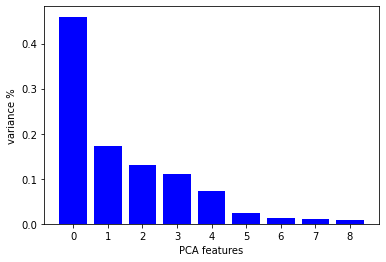

In [67]:
import matplotlib.pyplot as plt
# scree plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# df1_pca = pd.DataFrame(res_data)